## __House Prices Prediction__

We are provided with data on sale prices of houses in King County - Seattle. These are homes sold between __May 2014__ and __May 2015__

The objective of this project is to model the data such that we can predict future house prices based on the certain input variables.

## 1. Data Loading and Pre-processing

In [83]:
#Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


__Data Description__
* price: the price of the house. This is our target variable.

* bedrooms: Number of bedrooms

* bathrooms: Number of bathrooms

* sqft_living: Square footage of the house

* sqft_lot: Square footage of the lot

* floors: Number of floors/ Level

* waterfront: 1 = Waterfront view; 0 = No waterfront view

* view: 1 = House been viewed; 0 = House has not been viewed

* condition: 1 indicates worn-out property and 5 excellent

* grade: Overall grade given to the housing unit, based on the King County grading system. 1 poor,13 excellent

* sqft_above: Square footage of house apart from the basement

* sqft_below: Square footage of the basement

* yr_built: Year of the house built

* yr_renovated: Year of the house renovated

* zipcode: Zipcode

* lat: Latitude coordination

* long: Longitude coordination

* sqft_living15: Square footage of the house in 2015 (implies-- some renovations)

* sqft_lot15: Square footage of lot in 2015 (implies-- some renovations)

In [98]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16613 non-null  float64
 1   bedrooms       16613 non-null  int64  
 2   bathrooms      16613 non-null  float64
 3   sqft_living    16613 non-null  int64  
 4   sqft_lot       16613 non-null  int64  
 5   floors         16613 non-null  float64
 6   waterfront     16613 non-null  int64  
 7   view           16613 non-null  int64  
 8   condition      16613 non-null  int64  
 9   grade          16613 non-null  int64  
 10  sqft_above     16613 non-null  int64  
 11  sqft_basement  16613 non-null  int64  
 12  yr_built       16613 non-null  int64  
 13  yr_renovated   16613 non-null  int64  
 14  zipcode        16613 non-null  int64  
 15  lat            16613 non-null  float64
 16  long           16613 non-null  float64
 17  sqft_living15  16613 non-null  int64  
 18  sqft_l

There are no missing values in the dataset, we proceed to check for duplicates and other data inconsistencies.

In [99]:
house_data.duplicated().any()

True

In [100]:
similar_rows = house_data[house_data.duplicated(keep=False)]
similar_rows.sort_values(by='price', ascending=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
547,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
3950,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14982,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984


In [101]:
#drop the 3 duplicates
house_data = house_data.drop_duplicates()
house_data.shape

(16610, 19)

In [102]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.661000e+04,16610.000000,16610.000000,16610.000000,1.661000e+04,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000
mean,5.335285e+05,3.365984,2.062086,2053.884106,1.573960e+04,1.432450,0.007947,0.243889,3.449729,7.592414,1750.221734,303.662372,1967.294822,89.752258,98078.165202,47.560024,-122.215382,1974.796448,13288.307225
std,3.665432e+05,0.937193,0.758843,904.481774,4.195800e+04,0.509658,0.088794,0.781469,0.666610,1.168419,804.789558,450.735792,27.935174,413.623091,54.153733,0.139719,0.138661,673.028862,27458.700539
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1415.500000,5.455000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.464600,-122.327000,1490.000000,5421.500000
50%,4.470000e+05,3.000000,2.000000,1899.500000,7.902500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7823.000000
75%,6.389250e+05,4.000000,2.500000,2500.000000,1.107075e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679075,-122.127250,2330.000000,10326.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


In [106]:
house_data['grade'].value_counts()

grade
7     7278
8     4411
9     1814
6     1706
10     802
11     287
5      200
12      73
4       24
13      12
3        3
Name: count, dtype: int64

In [35]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
house_data['yr_built'].value_counts()

yr_built
2004    344
1977    344
2003    339
1978    329
1968    323
       ... 
1902     23
1933     22
1935     20
1934     16
2015     10
Name: count, Length: 116, dtype: int64

Drop columns not relevant to include in the model

In [37]:
house_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
# house_data = house_data.drop(columns=['yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'])
# house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503


## 2. Exploratory Analysis

To build a useful model we need to examine the features that highly influence the price of a house.

A correlation matrix can help examine the relationship between the price and different inputs from our data.

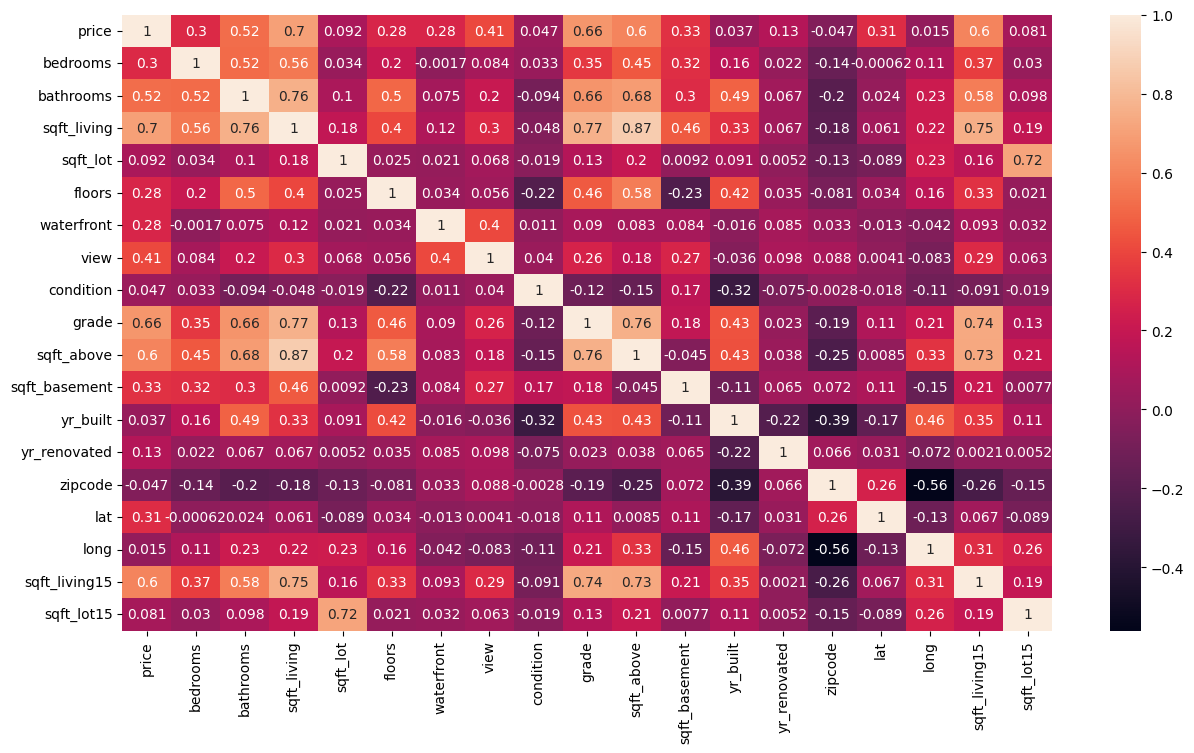

In [107]:
plt.figure(figsize = (15, 8))
sns.heatmap(house_data.corr(), annot = True)
plt.show()

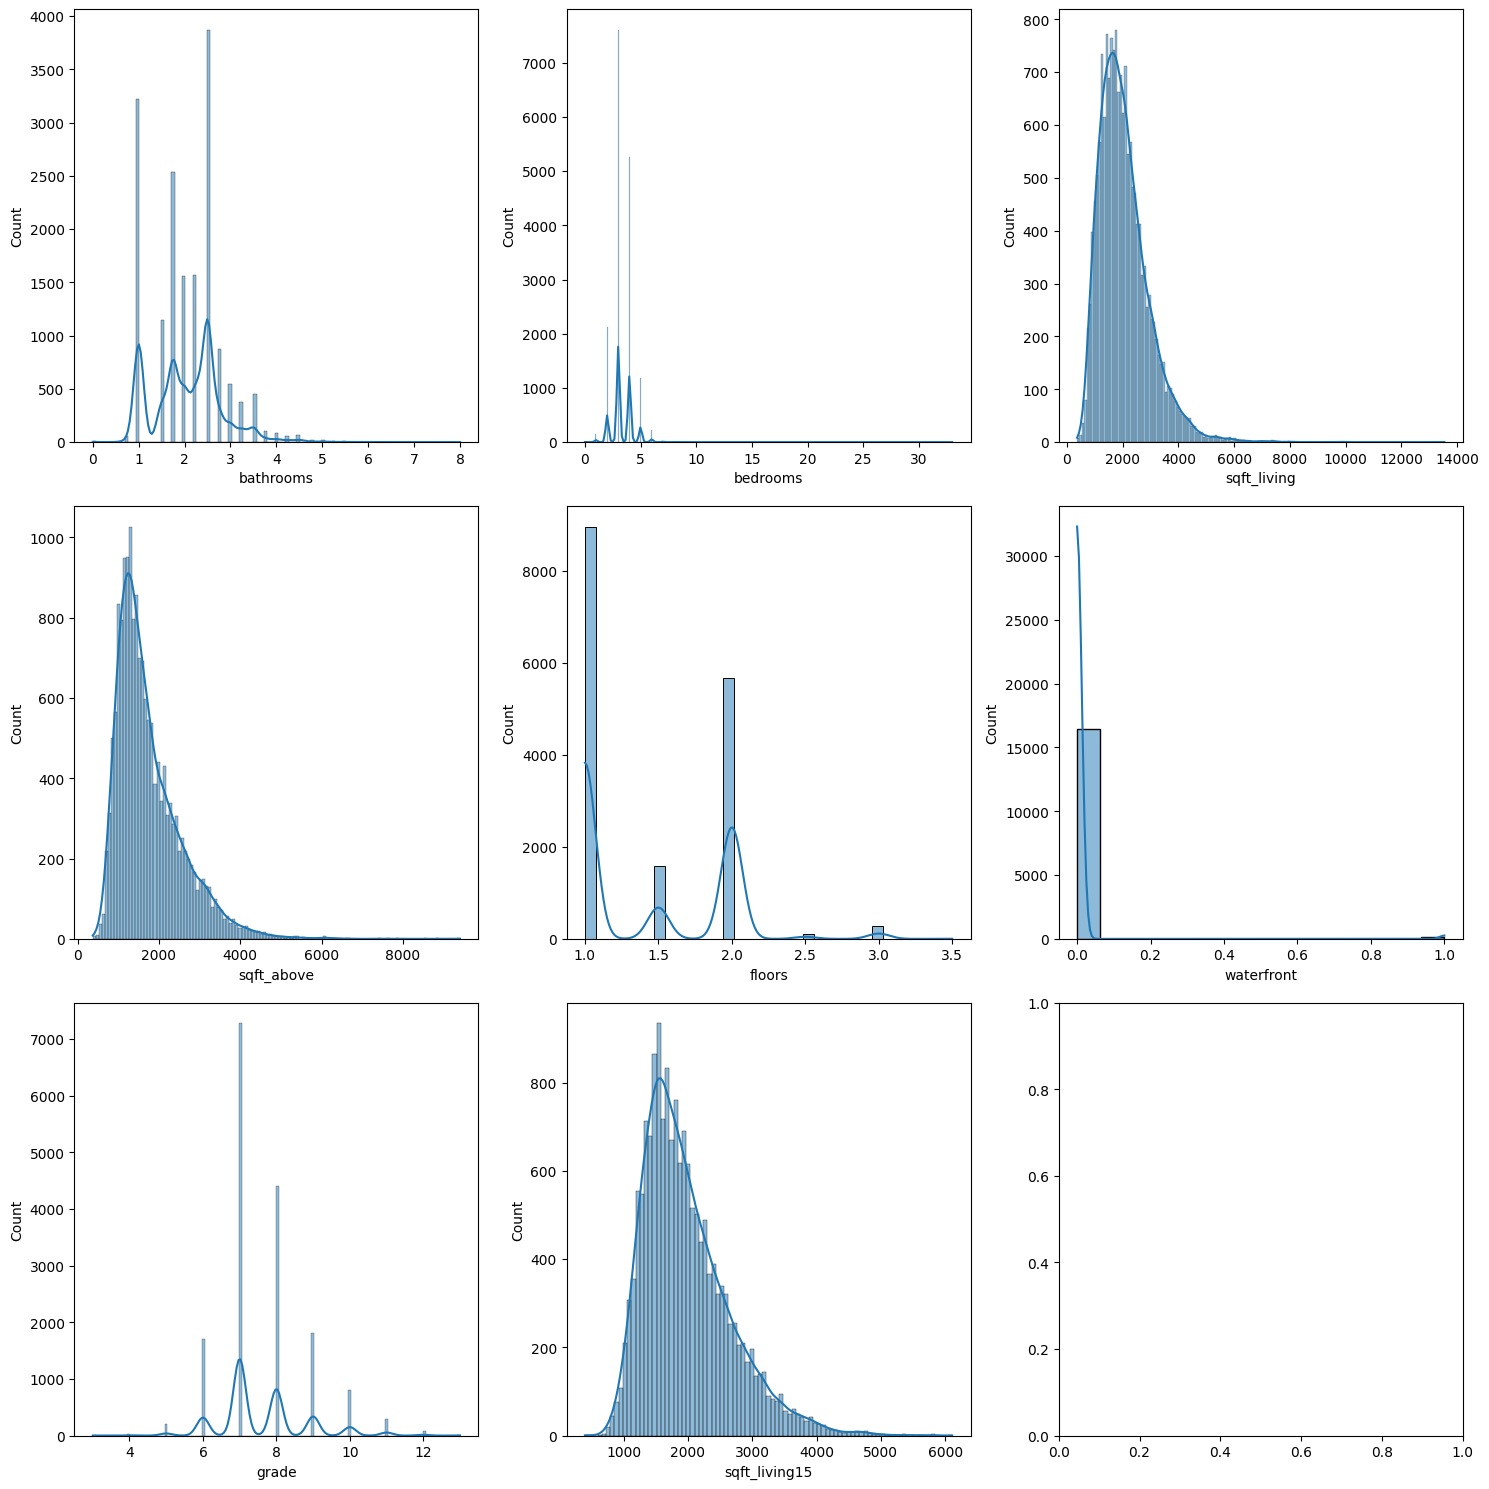

In [54]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (15, 15))
sns.histplot(x = house_data['bathrooms'], kde=True, ax = axs[0, 0])
sns.histplot(x = house_data['bedrooms'], kde=True, ax = axs[0, 1])
sns.histplot(x = house_data['sqft_living'], kde=True, ax = axs[0, 2])
sns.histplot(x = house_data['sqft_above'], kde=True, ax = axs[1, 0])
sns.histplot(x = house_data['floors'], kde=True, ax = axs[1, 1])
#sns.histplot(x = house_data['yr_built'], kde=True, ax = axs[1, 2])
sns.histplot(x = house_data['waterfront'], kde=True, ax = axs[1, 2])
sns.histplot(x = house_data['grade'], kde=True, ax = axs[2, 0])
sns.histplot(x = house_data['sqft_living15'], kde=True, ax = axs[2, 1])
plt.tight_layout()

In [ ]:
numeric_columns = house_data.select_dtypes(include=['int', 'float'])

# Loop through each numeric column and plot its distribution
for column in numeric_columns.columns:
    sns.histplot(house_data[column], kde=True)  # kde=True adds a kernel density estimate
    plt.title(f'Distribution of {column}')
    plt.show()

## 3. Model Building

Separating input variables (X) and target variable (y)

In [57]:
X = house_data.drop('price', axis=1)
y = house_data['price']

Data normalization

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
#create a minmaxscaler object
scaler = MinMaxScaler()

#fit scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

#convert normalized data back to a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.164770,0.005732
1,0.090909,0.28125,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.226055,0.008017
2,0.060606,0.12500,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.406409,0.008503
3,0.121212,0.37500,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.168272,0.004985
4,0.090909,0.25000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.245316,0.007861


In [64]:
X_scaled.shape

(16610, 13)

In [65]:
y.shape

(16610,)

Train and Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [66]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=3)

In [69]:
print('X_scaled_train', X_scaled_train.shape)
print('X_scaled_test', X_scaled_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_scaled_train (11627, 13)
X_scaled_test (4983, 13)
y_train (11627,)
y_test (4983,)


#Train the model

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()
lr.fit(X_scaled_train, y_train)

LinearRegression()

## 4. Model Evaluation

In [80]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [81]:
print("Model intercept : ", lr.intercept_, "\n")
print("Model coefficient: ", lr.coef_, "\n")

Model intercept :  -225437.18020767474 

Model coefficient:  [-1174240.15773117  -192730.54620316   933628.87600195   228940.0877636
    18742.3815429    661945.56854132   204974.3913589    211279.95431399
   908416.09935773   977918.43760919   716910.70974246   200895.83837184
  -843246.44557272] 



#### Perfomance on training

In [90]:
y_train_pred = lr.predict(X_scaled_train)
rmse = print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
rmse

226283.68002012846


In [94]:
# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['Predicted'] = y_train_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
output

,price,Predicted,Difference
1690,576000.0,5.766560e+05,6.559573e+02
59,430000.0,4.518141e+05,2.181410e+04
2457,408000.0,2.513953e+05,-1.566047e+05
13485,470000.0,3.835741e+05,-8.642588e+04
8271,292000.0,1.687525e+05,-1.232475e+05
14891,725000.0,8.446507e+05,1.196507e+05
14239,374000.0,5.635040e+05,1.895040e+05
14996,269950.0,5.789041e+05,3.089541e+05
12778,316000.0,5.471531e+05,2.311531e+05
8450,425000.0,1.633617e+06,1.208617e+06


#### Perfomance on test data

In [88]:
y_pred = lr.predict(X_scaled_test)
rmse = print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
rmse

240787.31933557658


In [95]:
# Examine the first 10 predicted output from the model
output2 = pd.DataFrame(y_test[0:10])
output2['Predicted'] = y_pred[0:10]
output2['Difference'] = output2['Predicted'] - output2['price']
output2

,price,Predicted,Difference
1050,410000.0,302468.082611,-107531.917389
1233,208000.0,254450.952235,46450.952235
3148,781000.0,544119.176622,-236880.823378
4294,537000.0,470702.192389,-66297.807611
9067,665000.0,885590.599434,220590.599434
2395,995000.0,694596.328778,-300403.671222
976,469500.0,710107.832965,240607.832965
11689,400000.0,156946.166602,-243053.833398
531,200000.0,353836.873721,153836.873721
7402,263000.0,434519.699162,171519.699162


## Model Evaluation Dataset

In [39]:
eval_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')
eval_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5,3.25,5210,35765,2.5,0,4,5,10,4940,270,1911,0,98136,47.5463,-122.397,2590,10250
1,5,2.00,2800,17788,1.0,0,0,4,8,1400,1400,1963,0,98033,47.6719,-122.163,1760,18282
2,4,2.25,2060,44431,2.0,0,0,3,7,2060,0,1988,0,98077,47.7440,-122.046,2160,45657
3,5,2.00,2360,19899,1.0,0,0,4,7,2360,0,1968,0,98010,47.3299,-122.046,1860,19998
4,4,2.50,2370,6557,2.0,0,0,3,9,2370,0,1998,0,98042,47.4230,-122.155,2370,7378


In [40]:
eval_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       4999 non-null   int64  
 1   bathrooms      4999 non-null   float64
 2   sqft_living    4999 non-null   int64  
 3   sqft_lot       4999 non-null   int64  
 4   floors         4999 non-null   float64
 5   waterfront     4999 non-null   int64  
 6   view           4999 non-null   int64  
 7   condition      4999 non-null   int64  
 8   grade          4999 non-null   int64  
 9   sqft_above     4999 non-null   int64  
 10  sqft_basement  4999 non-null   int64  
 11  yr_built       4999 non-null   int64  
 12  yr_renovated   4999 non-null   int64  
 13  zipcode        4999 non-null   int64  
 14  lat            4999 non-null   float64
 15  long           4999 non-null   float64
 16  sqft_living15  4999 non-null   int64  
 17  sqft_lot15     4999 non-null   int64  
dtypes: float